In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

In [2]:
data = pd.read_csv("train.csv")

In [3]:
# Dimensions of training data
data.shape

(4277, 13)

In [4]:
# Print first few rows of data
data.head()

,id,timestamp,country,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,1,12/11/2018 10:52:26,Slovenia,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,2,1/5/2017 16:57:50,United States,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,3,12/18/2017 8:13:15,Sweden,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,4,12/27/2018 4:56:52,United States,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,5,12/11/2018 14:07:58,United States,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [5]:
# drop id, timestamp and country columns
data = data.drop(columns=['id', 'timestamp','country'])

In [6]:
# Explore columns
data.columns

Index(['employment_status', 'job_title', 'job_years', 'is_manager',
       'hours_per_week', 'telecommute_days_per_week', 'education',
       'is_education_computer_related', 'certifications', 'salary'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   employment_status              4277 non-null   object 
 1   job_title                      4277 non-null   object 
 2   job_years                      4277 non-null   float64
 3   is_manager                     4277 non-null   object 
 4   hours_per_week                 4260 non-null   float64
 5   telecommute_days_per_week      4266 non-null   float64
 6   education                      4277 non-null   object 
 7   is_education_computer_related  4261 non-null   object 
 8   certifications                 4277 non-null   object 
 9   salary                         4277 non-null   float64
dtypes: float64(4), object(6)
memory usage: 334.3+ KB


In [8]:
# replace NANs in hours_per_week and telecommute_days_per_week with median value of the columns respectively  
data.loc[data['hours_per_week'].isna(), 'hours_per_week'] = data['hours_per_week'].median()
data.loc[data['telecommute_days_per_week'].isna(), 'telecommute_days_per_week'] = data['telecommute_days_per_week'].median()

In [9]:
#Handling null values in categorical columns
data = data.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4261 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   employment_status              4261 non-null   object 
 1   job_title                      4261 non-null   object 
 2   job_years                      4261 non-null   float64
 3   is_manager                     4261 non-null   object 
 4   hours_per_week                 4261 non-null   float64
 5   telecommute_days_per_week      4261 non-null   float64
 6   education                      4261 non-null   object 
 7   is_education_computer_related  4261 non-null   object 
 8   certifications                 4261 non-null   object 
 9   salary                         4261 non-null   float64
dtypes: float64(4), object(6)
memory usage: 366.2+ KB


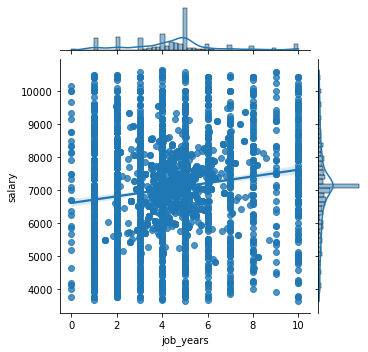

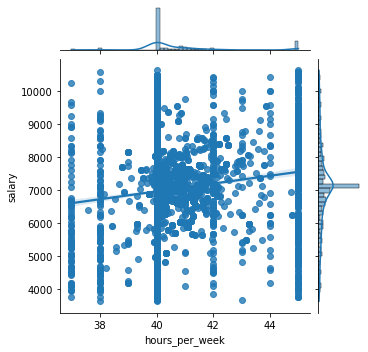

In [11]:
# joint plots for numeric variables

cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.jointplot(x=c, y="salary", data=data, kind = 'reg', height = 5)
plt.show()

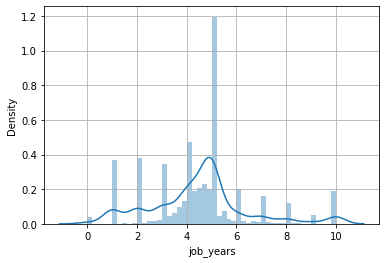

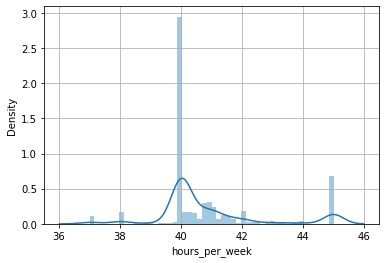

In [12]:
cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.distplot(data[c])
    plt.grid()
    plt.show()

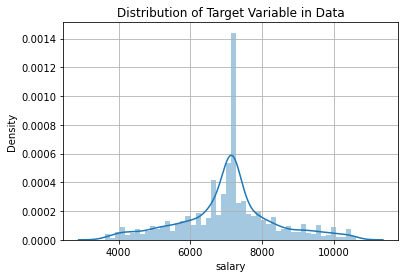

max: 10625.0
min: 3622.0


In [13]:
# distribution of target variable
sns.distplot(data['salary'])
plt.grid()
plt.title('Distribution of Target Variable in Data')
plt.show()
print('max:', np.max(data['salary']))
print('min:', np.min(data['salary']))

In [14]:
# create another copy of dataset and append encoded features to it
data_train = data.copy()
data_train.head()

,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [15]:
# select categorical features
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object' 
            and c not in ['is_manager', 'certifications']]
cat_data = data_train[cat_cols]
cat_cols

['employment_status',
 'job_title',
 'education',
 'is_education_computer_related']

In [16]:
#Encoding binary variables
binary_cols = ['is_manager', 'certifications']
for c in binary_cols:
    data_train[c] = data_train[c].replace(to_replace=['Yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['No'], value=0)

In [17]:
final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True)
final_data.shape

(4261, 25)

In [18]:
final_data.columns

Index(['job_years', 'is_manager', 'hours_per_week',
       'telecommute_days_per_week', 'certifications', 'salary',
       'employment_status_Independent or freelancer or company owner',
       'employment_status_Part time', 'job_title_Analytics consultant',
       'job_title_Architect', 'job_title_DBA', 'job_title_Data Scientist',
       'job_title_Developer', 'job_title_Engineer', 'job_title_Manager',
       'job_title_Other', 'job_title_Principal database engineer',
       'job_title_Sales', 'job_title_Sr Consultant ',
       'education_Bachelors (4 years)', 'education_Doctorate/PhD',
       'education_Masters', 'education_None (no degree completed)',
       'is_education_computer_related_Unknown',
       'is_education_computer_related_Yes'],
      dtype='object')

In [19]:
final_data

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,salary,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
0,4.783930,1,40.0,0.0,0,7187.743094,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,5.000000,0,40.0,5.0,0,10000.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.000000,0,40.0,0.0,1,7000.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1.000000,0,40.0,2.0,0,8333.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3.000000,0,40.0,2.0,1,7137.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,2.000000,1,40.0,0.0,0,4917.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4273,4.140793,1,40.0,0.0,0,7033.845701,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4274,5.000000,0,40.0,0.0,0,7166.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4275,4.000000,1,40.0,2.0,0,9583.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [20]:
y = final_data['salary']
X = final_data.drop(columns=['salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (2982, 24)
Validation Set Dimensions: (1279, 24)


**Normalizing data**

In [21]:
# select numerical features
num_cols = ['job_years','hours_per_week','telecommute_days_per_week']
num_cols

['job_years', 'hours_per_week', 'telecommute_days_per_week']

In [22]:
# Apply standard scaling on numeric data 
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])

In [23]:
X_train

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
3647,0.266570,0,-0.478904,-0.023422,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1730,0.773868,0,-0.478904,-0.630753,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3734,-0.586114,0,1.163496,1.798572,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
126,-0.126399,0,-0.232528,-0.630753,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2265,-0.748027,0,2.395774,-0.023422,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,-0.748027,1,-0.478904,0.583910,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
423,0.266570,0,-1.628775,-0.630753,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3633,-0.626848,1,0.700405,-0.630753,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
998,-0.496630,0,0.812943,-0.630753,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [24]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [25]:
reg.coef_

array([  186.53993627,    63.19244043,   205.4232886 ,   237.38834495,
          57.50517844,  -104.59376931,    34.43390426, -2203.66613245,
        1158.3245072 ,   885.46102159,   705.86451847,   572.67688706,
        1078.49980819,   802.14161149,   185.07546524,  1003.39210991,
         762.65857778,  3601.61729279,   315.68443323,   171.42781641,
         159.16834582,   204.76250911,  -309.78421635,  -154.06539634])

In [26]:
reg.intercept_

6141.869029331916

In [27]:
mean_absolute_error(y_train,reg.predict(X_train))

867.0378767449072

In [28]:
mean_squared_error(y_train,reg.predict(X_train))**0.5

1223.6347514204917

## Practice
1. Preprocess Test data and get predictions
2. Compute Mean Abolute Error, Mean Square error for test data
3. Implement [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) and [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) Regression and then compute the following metrics on test data

In [29]:
X_test[num_cols] = scaler.transform(X_test[num_cols])
y_pred = reg.predict(X_test)


In [30]:
#mean absolute error and mean square error
print(mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred)**0.5)

847.4016208332762 1194.5093331341334


In [31]:
X_test.describe()

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.0,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.0,1279.0,1279.0,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,0.009180,0.228303,0.044977,-0.011075,0.482408,0.043784,0.002346,0.0,0.074277,0.507428,0.007819,0.243941,0.050039,0.050039,0.014855,0.0,0.0,0.0,0.549648,0.007819,0.180610,0.158718,0.153245,0.563722
std,1.033763,0.419903,1.027423,1.006424,0.499886,0.204695,0.048393,0.0,0.262323,0.500140,0.088111,0.429625,0.218111,0.218111,0.121021,0.0,0.0,0.0,0.497724,0.088111,0.384845,0.365556,0.360364,0.496117
min,-2.269923,0.000000,-2.203710,-0.630753,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.541477,0.000000,-0.478904,-0.630753,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.071281,0.000000,-0.478904,-0.630753,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.266570,0.000000,0.215178,-0.023422,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.803062,1.000000,2.395774,2.405903,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


847.2772746355065 1194.2988797648775


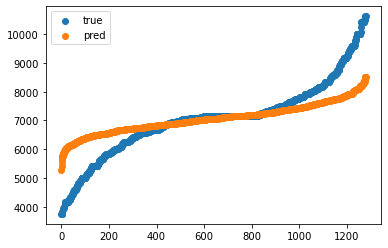

In [32]:
#Ridge regression
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test), label='true')
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred), label = 'pred')
plt.legend()

In [33]:
ridge.coef_

array([  186.30157866,    65.39498846,   203.79192549,   238.16805761,
          61.67885378,  -102.97038269,    27.23530734, -1122.39163548,
        1106.94580404,   838.96182706,   599.55604038,   526.50932836,
        1023.96752381,   750.75777221,   136.04849112,   477.55405653,
         359.55436317,  1775.69749944,   315.14028952,   169.03510547,
         156.82084837,   199.87495916,  -305.65466824,  -153.03138255])

847.4085566303256 1194.2287687780674


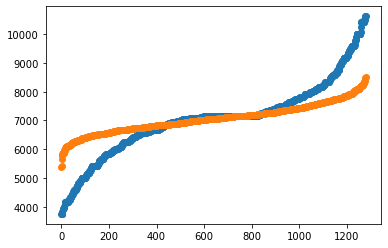

In [34]:
#lasso regression
lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
print(mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred)**0.5)

plt.scatter(np.arange(len(np.sort(y_test))),np.sort(y_test))
plt.scatter(np.arange(len(np.sort(y_pred))),np.sort(y_pred))

In [35]:
lasso.coef_

array([ 186.5902251 ,   66.0392209 ,  201.05915202,  238.21338987,
         63.38868359,  -66.09409608,    0.        ,   -0.        ,
        989.92147825,  730.53273208,  275.08263468,  416.79780628,
        903.78557033,  634.33330681,    0.        ,    0.        ,
          0.        ,  470.22810678,  287.69046723,   27.89083655,
        123.69513533,  141.72982929, -269.93842879, -144.12032148])

# Decision Trees and Random Forests

In [36]:
# train Decision Tree regression model
decisiontree = DecisionTreeRegressor(max_depth = 10, min_samples_split = 5)
decisiontree.fit(X_train, y_train)

#evaluating train error
mean_absolute_error(y_train,decisiontree.predict(X_train))

638.8891208334715

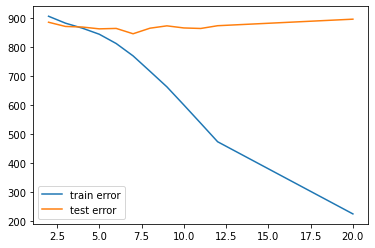

In [37]:
max_depth_list = [2,3,4,5,6,7,8,9,10,11,12,20]
train_error = []
test_error =[]

for md in max_depth_list:

    decisiontree = DecisionTreeRegressor(max_depth = md, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(max_depth_list,train_error,label = 'train error')
plt.plot(max_depth_list,test_error,label = 'test error')
plt.legend()

In [38]:
# Fitting a Random Forest Regressor
randomf = RandomForestRegressor()
randomf.fit(X_train, y_train)
mean_absolute_error(y_train,randomf.predict(X_train))

406.62431109844994

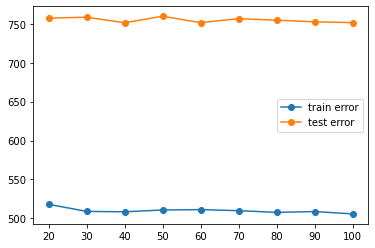

In [39]:
max_depth_list = [10,11,12,13,14,15,16,17,18,19,20]
train_error = []
test_error =[]
N_estimator=[20,30,40,50,60b,70,80,90,100]
for n in N_estimator:

    decisiontree = RandomForestRegressor(n_estimators=n, max_depth = 12, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(N_estimator,train_error,marker='o',label = 'train error')
plt.plot(N_estimator,test_error,marker='o',label = 'test error')
plt.legend()

In [40]:
pd.DataFrame({'feature':X_train.columns, "importance":randomf.feature_importances_*100}).sort_values(by='importance', ascending=False)

,feature,importance
0,job_years,25.401368
2,hours_per_week,16.263470
3,telecommute_days_per_week,9.312803
4,certifications,7.133871
23,is_education_computer_related_Yes,6.323674
18,education_Bachelors (4 years),4.850850
9,job_title_DBA,4.733784
1,is_manager,4.694686
20,education_Masters,3.808914
11,job_title_Developer,3.533777


Practice Questions:

1.Compute errors on test sets

2.Play with different parameter of decision trees and random forests and see the impact on train and test error

3.[OPTIONAL] implement cross validation and get best hyperparameters

In [41]:
print('the train_error is :',train_error)
print('the test_error is :',test_error)

the train_error is : [517.9918103170991, 508.85263725132404, 508.3571621914513, 510.6382357052079, 511.1357704115751, 509.76792445833644, 507.62106588971216, 508.6314161171653, 505.612575993047]
the test_error is : [757.4988463922916, 758.6211004995004, 751.5226754237199, 759.8634820858874, 751.6082690569932, 756.7799169416191, 754.7572848800244, 752.6874301048832, 751.6548352405963]


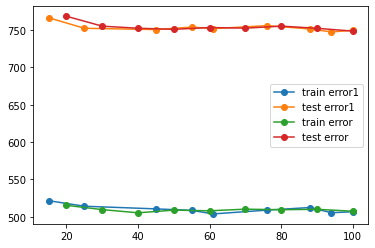

In [47]:
#random forest regressor - change in N_estimator
max_depth_list = [10,11,12,13,14,15,16,17,18,19,20]
train_error1 = []
test_error1 =[]

N_estimator=[15,25,45,55,61,76,88,94,100]
for n in N_estimator:

    decisiontree = RandomForestRegressor(n_estimators=n, max_depth = 12, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error1.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error1.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(N_estimator,train_error,marker='o',label = 'train error1')
plt.plot(N_estimator,test_error,marker='o',label = 'test error1')
plt.legend()

max_depth_list = [10,11,12,13,14,15,16,17,18,19,20]
train_error = []
test_error =[]
N_estimator=[20,30,40,50,60,70,80,90,100]
for n in N_estimator:

    decisiontree = RandomForestRegressor(n_estimators=n, max_depth = 12, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(N_estimator,train_error,marker='o',label = 'train error')
plt.plot(N_estimator,test_error,marker='o',label = 'test error')
plt.legend()

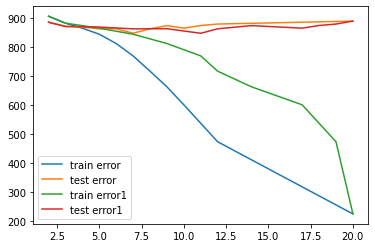

In [48]:
#decision tree regressor - change in N-estimator
max_depth_list = [2,3,4,5,6,7,8,9,10,11,12,20]
train_error = []
test_error =[]

for md in max_depth_list:

    decisiontree = DecisionTreeRegressor(max_depth = md, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(max_depth_list,train_error,label = 'train error')
plt.plot(max_depth_list,test_error,label = 'test error')
plt.legend()

max_depth_list = [2,3,5,7,9,11,12,14,17,18,19,20]
train_error1 = []
test_error1 =[]

for md in max_depth_list:

    decisiontree = DecisionTreeRegressor(max_depth = md, min_samples_split = 2)
    decisiontree.fit(X_train, y_train)
    train_error1.append(mean_absolute_error(y_train,decisiontree.predict(X_train)))
    test_error1.append(mean_absolute_error(y_test,decisiontree.predict(X_test)))

plt.plot(max_depth_list,train_error,label = 'train error1')
plt.plot(max_depth_list,test_error,label = 'test error1')
plt.legend()
